# Deep Learning Project Notebook

### Import modulde

In [62]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from src import download_data,model,train,evaluate,preprocessed
import importlib
import torch.nn as nn
import torch.optim as optim



In [95]:
importlib.reload(download_data)
importlib.reload(model)
importlib.reload(train)
importlib.reload(evaluate)
importlib.reload(preprocessed)

<module 'src.preprocessed' from 'c:\\Users\\coren\\Projet Deep Learning\\Face_Generation-master\\CS230\\src\\preprocessed.py'>

### Download_data

In [69]:
download_data.download_data()

### Process data

In [73]:
num_input = preprocessed.preprocess_data_features()
temp,dev = preprocessed.split_dataset_dev()

## Declare Module

### Module 1 : one layer model

Epoch [1/100], Loss: 1.6348
Epoch [2/100], Loss: 1.5213
Epoch [3/100], Loss: 1.4237
Epoch [4/100], Loss: 1.3254
Epoch [5/100], Loss: 1.2241
Epoch [6/100], Loss: 1.1482
Epoch [7/100], Loss: 1.0689
Epoch [8/100], Loss: 0.9969
Epoch [9/100], Loss: 0.9263
Epoch [10/100], Loss: 0.8718
Epoch [11/100], Loss: 0.8198
Epoch [12/100], Loss: 0.7759
Epoch [13/100], Loss: 0.7247
Epoch [14/100], Loss: 0.6879
Epoch [15/100], Loss: 0.6526
Epoch [16/100], Loss: 0.6228
Epoch [17/100], Loss: 0.5934
Epoch [18/100], Loss: 0.5730
Epoch [19/100], Loss: 0.5528
Epoch [20/100], Loss: 0.5355
Epoch [21/100], Loss: 0.5182
Epoch [22/100], Loss: 0.5079
Epoch [23/100], Loss: 0.4922
Epoch [24/100], Loss: 0.4859
Epoch [25/100], Loss: 0.4794
Epoch [26/100], Loss: 0.4716
Epoch [27/100], Loss: 0.4624
Epoch [28/100], Loss: 0.4574
Epoch [29/100], Loss: 0.4565
Epoch [30/100], Loss: 0.4443
Epoch [31/100], Loss: 0.4461
Epoch [32/100], Loss: 0.4408
Epoch [33/100], Loss: 0.4364
Epoch [34/100], Loss: 0.4316
Epoch [35/100], Loss: 0

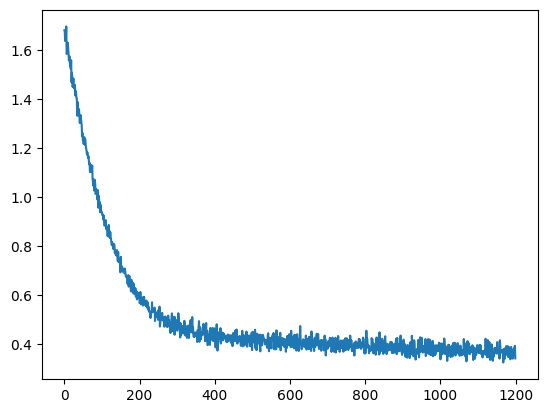

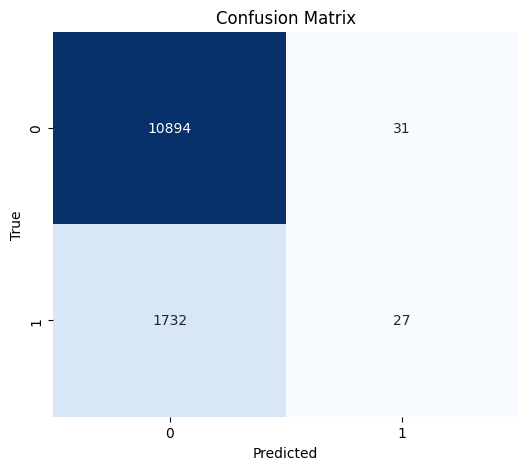

{'accuracy': 0.8610059918006938,
 'f1_score': 0.02971931755641167,
 'false_positive': 31,
 'false_negative': 1732}

In [96]:
num_hidden_neurone = 40
model_one_layer = model.create_sequential_model(num_input,[num_hidden_neurone],dropout_rates=0.1)
criterion = nn.BCELoss()
optimizer = optim.Adam(model_one_layer.parameters(), lr=0.0001,betas= (0.9,0.99))

train_losses = train.train_model(temp,model_one_layer,criterion,optimizer,100,batch_size=1024)
plt.plot(train_losses)

evaluate.evaluate_model(model_one_layer,dev)

### Model 2 : MLP

Epoch [1/100], Loss: 0.6115
Epoch [2/100], Loss: 0.4804
Epoch [3/100], Loss: 0.4479
Epoch [4/100], Loss: 0.4458
Epoch [5/100], Loss: 0.4407
Epoch [6/100], Loss: 0.4319
Epoch [7/100], Loss: 0.4280
Epoch [8/100], Loss: 0.4250
Epoch [9/100], Loss: 0.4208
Epoch [10/100], Loss: 0.4157
Epoch [11/100], Loss: 0.4131
Epoch [12/100], Loss: 0.4117
Epoch [13/100], Loss: 0.4056
Epoch [14/100], Loss: 0.4024
Epoch [15/100], Loss: 0.3981
Epoch [16/100], Loss: 0.3929
Epoch [17/100], Loss: 0.3929
Epoch [18/100], Loss: 0.3929
Epoch [19/100], Loss: 0.3896
Epoch [20/100], Loss: 0.3870
Epoch [21/100], Loss: 0.3845
Epoch [22/100], Loss: 0.3820
Epoch [23/100], Loss: 0.3821
Epoch [24/100], Loss: 0.3779
Epoch [25/100], Loss: 0.3766
Epoch [26/100], Loss: 0.3739
Epoch [27/100], Loss: 0.3754
Epoch [28/100], Loss: 0.3729
Epoch [29/100], Loss: 0.3741
Epoch [30/100], Loss: 0.3720
Epoch [31/100], Loss: 0.3725
Epoch [32/100], Loss: 0.3716
Epoch [33/100], Loss: 0.3678
Epoch [34/100], Loss: 0.3687
Epoch [35/100], Loss: 0

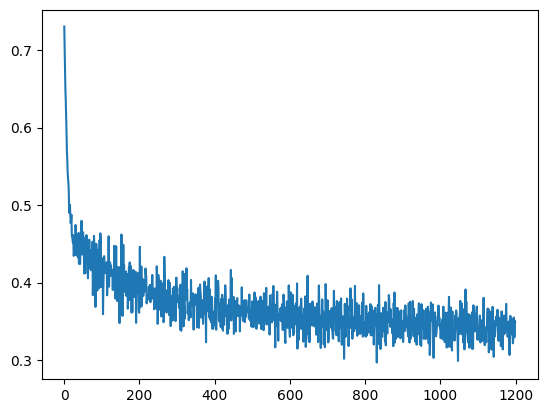

In [91]:
hidden_layers = [200,200,70]
model_mlp = model.create_sequential_model(num_input,hidden_layers,dropout_rates=0.2)
criterion = nn.BCELoss()
optimizer = optim.Adam(model_mlp.parameters(), lr=0.0001,betas= (0.9,0.99))

train_losses = train.train_model(temp,model_mlp,criterion,optimizer,100,batch_size=1024)
plt.plot(train_losses)